In [1]:
#ANALIZA DANYCH W R I PYTHON
#ZAROBKI ZAWODNIKOW NBA W ZALEZNOSCI OD ICH SKUTECZNOSCI ORAZ POPULARNOSCI

In [2]:
#PAKIETY

#1.1 INSTALACJA PAKIETOW
import pip
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install openpyxl
%pip install scikit-learn
%pip install numpy
%pip install scipy
%pip install statsmodels
%pip install jinja2

import matplotlib.ticker as ticker
#1.2 IMPORT PAKIETOW
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from math import pi
import numpy as np
from scipy.stats import norm
from matplotlib.colors import LogNorm
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.5 MB 7.7 MB/s eta 0:00:02
   ------------ --------------------------- 2.9/9.5 MB 9.1 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.5 MB 8.9 MB/s eta 0:00:01
   -------------------------- ------------- 6.3/9.5 MB 8.1 MB/s eta 0:00:01
   -------------------------------- ------- 7.9/9.5 MB 8.0 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.5 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#DANE

#2.1 WCZYTANIE DANYCH
data = pd.read_excel('data_NBA.xlsx')

#2.2 SŁOWNIK ZMIENNYCH
opis_kolumn = {
    "Zawodnik": "Imie i nazwisko koszykarza",
    "Zespół": "Skrót nazwy drużyny (np. GSW - Golden State Warriors)",
    "Wiek": "Wiek zawodnika (w latach)",
    "Mecze": "Liczba rozegranych spotkań w sezonie",
    "Wygrane": "Liczba wygranych meczów",
    "Przegrane": "Liczba przegranych meczów",
    "Minuty_srednio": "Średnia liczba minut spędzanych na parkiecie w meczu",
    "Punkty_srednio": "Średnia liczba zdobywanych punktów na mecz",
    "Celnerzuty_srednio": "Średnia liczba celnych rzutów z gry na mecz",
    "Rzuty_srednio": "Średnia liczba wszystkich oddanych rzutów na mecz",
    "Skuteczność_proc": "Procentowa skuteczność rzutów z gry",
    "Zbiorki_srednia": "Średnia liczba zbiórek na mecz",
    "Asysty_srednio": "Średnia liczba asyst (podań kończących się punktem) na mecz",
    "Straty_srednio": "Średnia liczba strat piłki na mecz",
    "Przechwyty_srednia": "Średnia liczba przejęć piłki od przeciwnika na mecz",
    "Blok_srednia": "Średnia liczba zablokowanych rzutów rywala na mecz",
    "Faul_srednio": "Średnia liczba fauli popełnianych na mecz",
    "Pensja": "Roczne wynagrodzenie zawodnika w dolarach (USD)",
    "Pozycja": "Pozycja na boisku (Obrońca, Skrzydłowy, Środkowy)",
    "Obserwujacy_mln": "Wskaźnik popularności (liczba obserwujących w mln na Instagramie)"
}

print("\n Słownik zmiennych (Opis kolumn):")
print("-" * 60)
print(f"{'ZMIENNA':<25} | {'OPIS'}")
print("-" * 60)

for kolumna, opis in opis_kolumn.items():
    print(f"{kolumna:<25} | {opis}")

#ZMIANA NAZWY ZMIENNEJ
data.rename(columns={'Salary': 'Pensja'}, inplace=True)

#2.3 WYMIAR DANYCH
print(f"\nWymiary zbioru danych: {data.shape}")

#2.4 WERYFIKACJA BRAKOW
print("\nLaczna liczba brakow danych:")
print(data.isnull().sum().sum())

#2.5 TYP DANYCH
print("\nTypy danych w kolumnach:")
print(data.dtypes)

#2.6 STRUKTURA DANYCH
print("\nPierwsze 5 wierszy danych:")
print(data.head())

#2.7 STATYSTYKI OPISOWE
print("\nStatystyki opisowe:")
print(data.describe().round(2))





 Słownik zmiennych (Opis kolumn):
------------------------------------------------------------
ZMIENNA                   | OPIS
------------------------------------------------------------
Zawodnik                  | Imie i nazwisko koszykarza
Zespół                    | Skrót nazwy drużyny (np. GSW - Golden State Warriors)
Wiek                      | Wiek zawodnika (w latach)
Mecze                     | Liczba rozegranych spotkań w sezonie
Wygrane                   | Liczba wygranych meczów
Przegrane                 | Liczba przegranych meczów
Minuty_srednio            | Średnia liczba minut spędzanych na parkiecie w meczu
Punkty_srednio            | Średnia liczba zdobywanych punktów na mecz
Celnerzuty_srednio        | Średnia liczba celnych rzutów z gry na mecz
Rzuty_srednio             | Średnia liczba wszystkich oddanych rzutów na mecz
Skuteczność_proc          | Procentowa skuteczność rzutów z gry
Zbiorki_srednia           | Średnia liczba zbiórek na mecz
Asysty_srednio         

In [4]:
#PRZEKSZTALCANIE DANYCH

#3.2 ZAMIANA DANYCH NA LICZBOWE 
data_liczbowe = data.columns.difference(['Zawodnik', 'Zespół', 'Pozycja', 'Obserwujacy_mln'])
data[data_liczbowe] = data[data_liczbowe].apply(pd.to_numeric, errors='coerce')

#3.3 ZAMIANA DANYCH W KOLUMIE Z OBSERWUJACYMI I ZAMIANA NA WARTOSCI NUMERYCZNE
data['Obserwujacy_mln'] = data['Obserwujacy_mln'].replace('<1', 0.5)
data['Obserwujacy_mln'] = pd.to_numeric(data['Obserwujacy_mln'], errors='coerce')

#3.4 TYP DANYCH PO ZMIANIE
print("\nTypy danych po zmianie:")
print(data.dtypes)





Typy danych po zmianie:
Zawodnik               object
Zespół                 object
Wiek                    int64
Mecze                   int64
Wygrane                 int64
Przegrane               int64
Minuty_srednio        float64
Punkty_srednio        float64
Celnerzuty_srednio    float64
Rzuty_srednio         float64
Skuteczność_proc      float64
Zbiorki_srednia       float64
Asysty_srednio        float64
Straty_srednio        float64
Przechwyty_srednia    float64
Blok_srednia          float64
Faul_srednio          float64
Pensja                  int64
Pozycja                object
Obserwujacy_mln       float64
dtype: object


C:\Users\domin\AppData\Local\Temp\ipykernel_11036\2528292102.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Obserwujacy_mln'] = data['Obserwujacy_mln'].replace('<1', 0.5)



Największe zarobki (Salary):
        Zawodnik    Pensja  Obserwujacy_mln  Punkty_srednio
0  Stephen Curry  55761216             58.4            24.5
1   Nikola Jokic  51415938              0.5            29.6
2    Joel Embiid  51415938              7.2            23.8

Najwięcej obserwujących:
              Zawodnik    Pensja  Obserwujacy_mln  Punkty_srednio
13        LeBron James  48728845            159.7            24.4
0        Stephen Curry  55761216             58.4            24.5
283  Russell Westbrook   3303771             22.6            13.3

Najwięcej punktów średnio:
                   Zawodnik    Pensja  Obserwujacy_mln  Punkty_srednio
32  Shai Gilgeous-Alexander  35859950              4.8            32.7
11    Giannis Antetokounmpo  48787676             16.0            30.4
1              Nikola Jokic  51415938              0.5            29.6

Najwięcej minut na boisku:
        Zawodnik    Pensja  Obserwujacy_mln  Minuty_srednio
35  Tyrese Maxey  35147000              

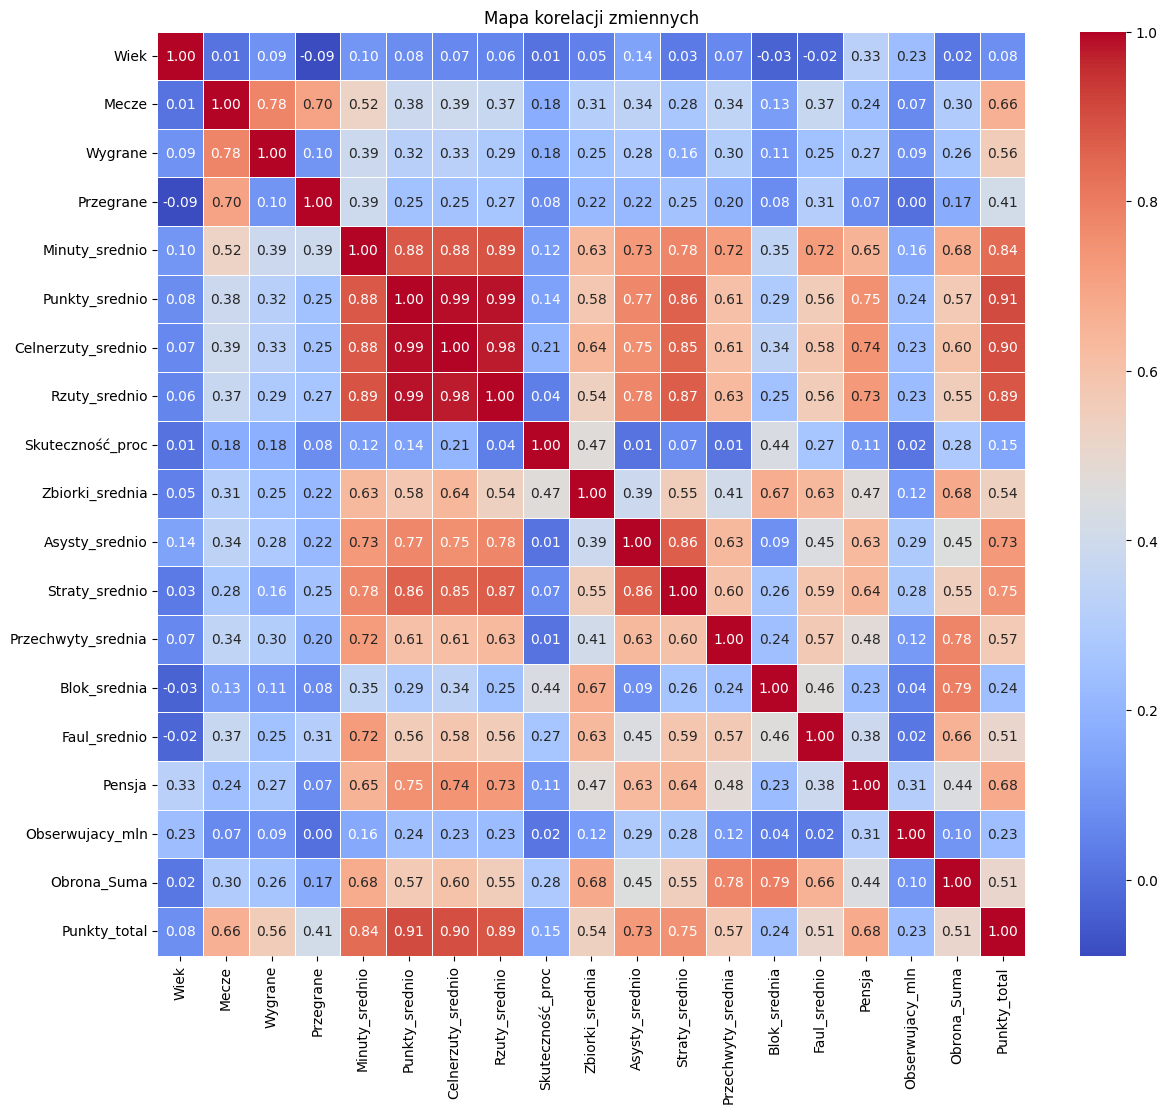

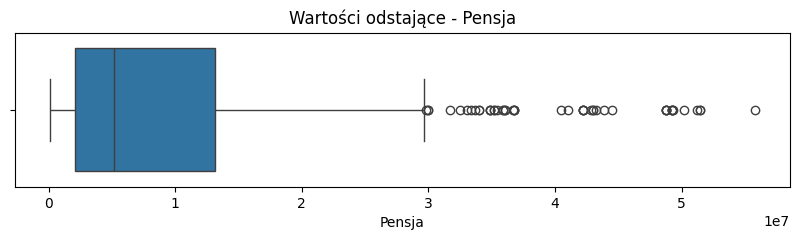

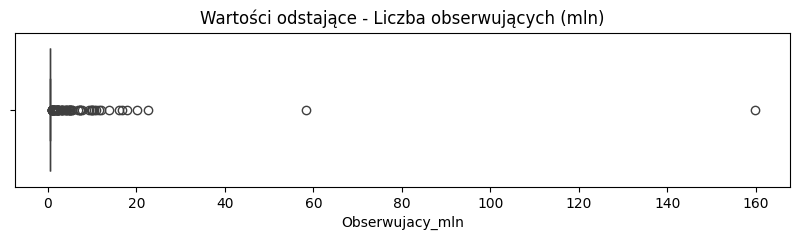

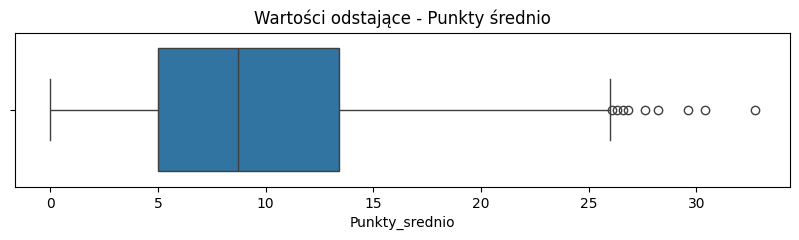

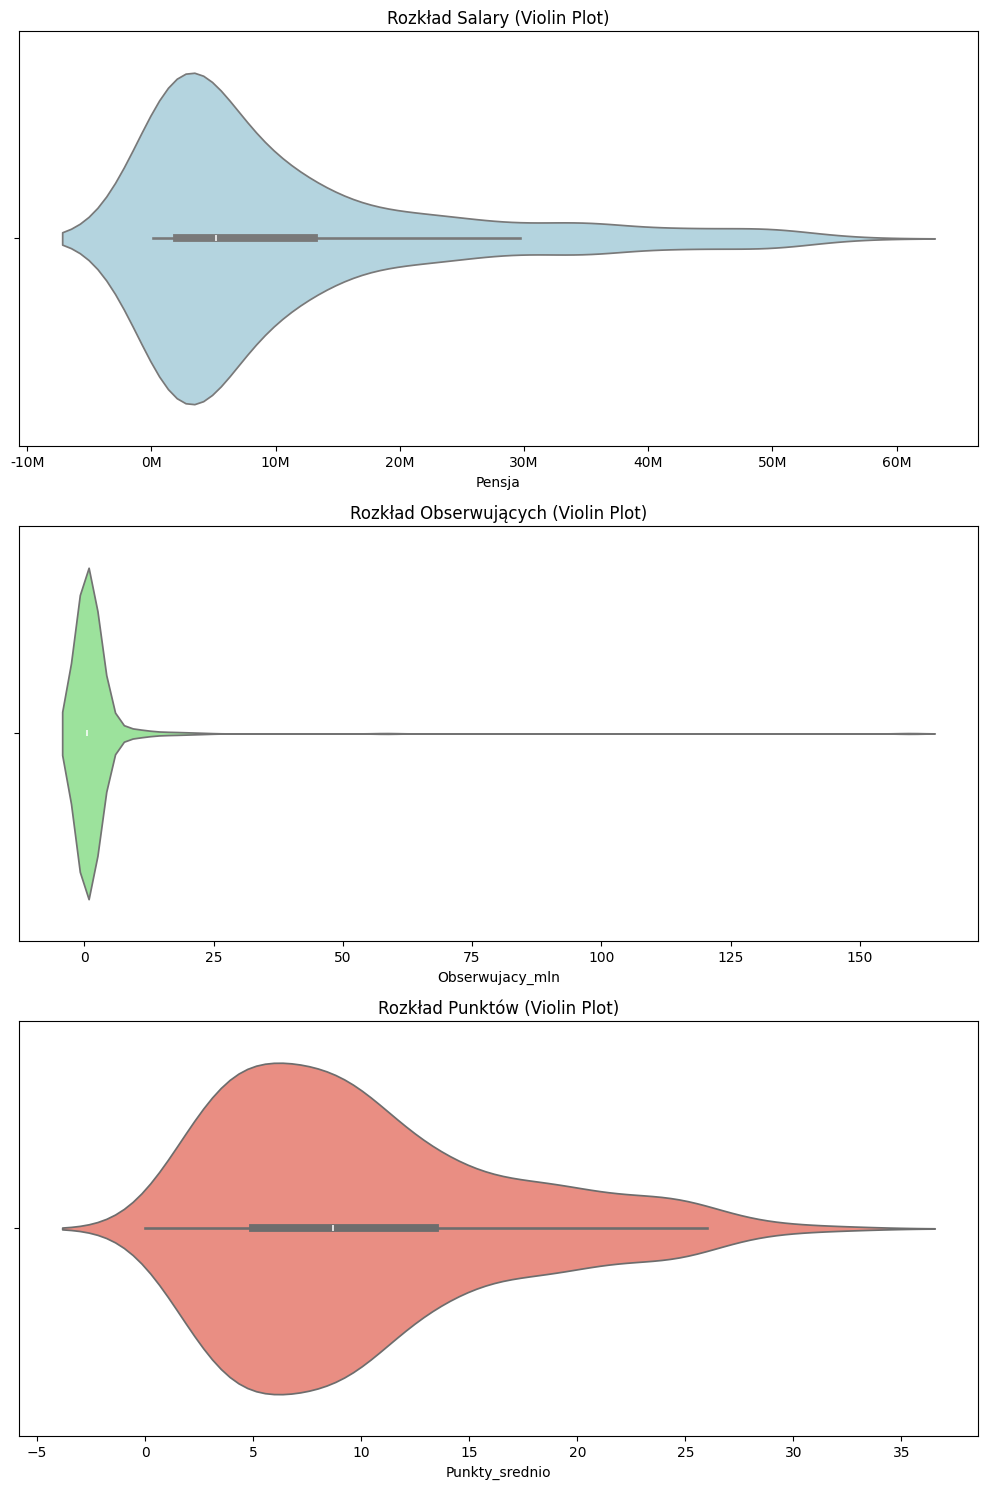

RAPORT KSZTAŁTU ROZKŁADU DANYCH:


,Skośność (Skew),Kurtoza (Kurt),Co to znaczy? (Skośność),Co to znaczy? (Kurtoza)
Obserwujacy_mln,16.350775,304.188694,"🔴 Silnie prawoskośny (Dużo małych, garstka gigantów)",⚠️ Bardzo spiczasty (Ogromne outliery!)
Blok_srednia,2.520211,11.223198,"🔴 Silnie prawoskośny (Dużo małych, garstka gigantów)",⚠️ Bardzo spiczasty (Ogromne outliery!)
Skuteczność_proc,0.294932,3.569338,✅ Rozkład zbliżony do normalnego,⚠️ Bardzo spiczasty (Ogromne outliery!)
Asysty_srednio,1.531042,2.647542,"🔴 Silnie prawoskośny (Dużo małych, garstka gigantów)",🔺 Nieco spiczasty (Trochę outlierów)
Obrona_Suma,1.031322,2.286506,"🔴 Silnie prawoskośny (Dużo małych, garstka gigantów)",🔺 Nieco spiczasty (Trochę outlierów)
Przechwyty_srednia,0.960625,2.038123,✅ Rozkład zbliżony do normalnego,🔺 Nieco spiczasty (Trochę outlierów)
Pensja,1.675743,2.037185,"🔴 Silnie prawoskośny (Dużo małych, garstka gigantów)",🔺 Nieco spiczasty (Trochę outlierów)
Zbiorki_srednia,1.244914,1.837392,"🔴 Silnie prawoskośny (Dużo małych, garstka gigantów)",🔺 Nieco spiczasty (Trochę outlierów)
Straty_srednio,1.215356,1.341251,"🔴 Silnie prawoskośny (Dużo małych, garstka gigantów)",🔺 Nieco spiczasty (Trochę outlierów)
Punkty_total,1.052119,0.759652,"🔴 Silnie prawoskośny (Dużo małych, garstka gigantów)",🟢 Płaski / Normalny (Brak ekstremów)



Najsilniejsza korelacja Spearmana (rangowa) pomiędzy zmiennymi:
Punkty_srednio  Asysty_srednio       0.80
Asysty_srednio  Przechwyty_srednia   0.73
Pensja          Punkty_srednio       0.70
Punkty_srednio  Przechwyty_srednia   0.70
Pensja          Asysty_srednio       0.60
dtype: float64


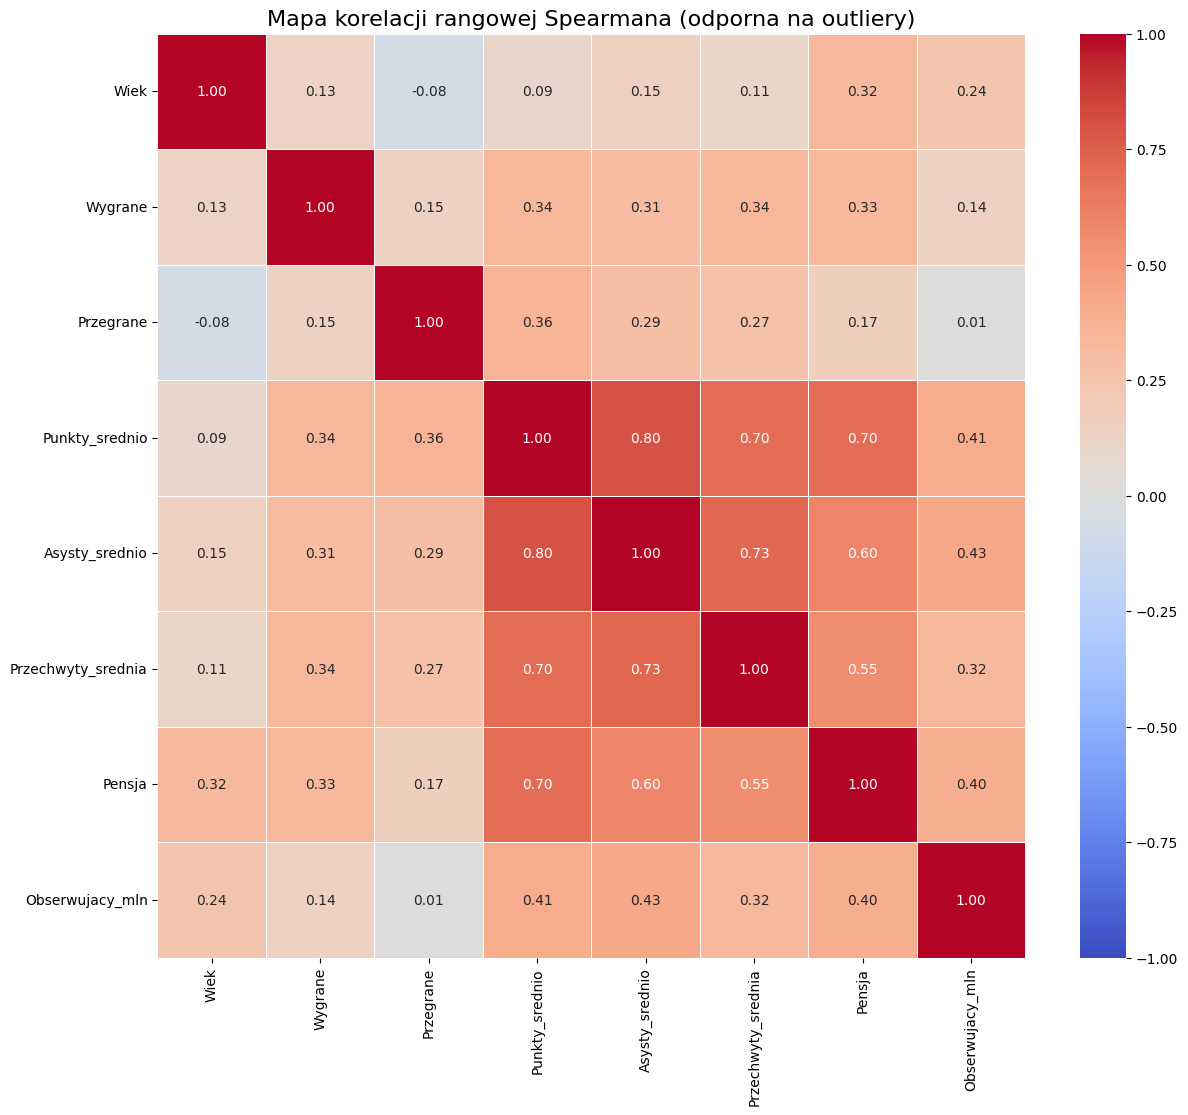

In [5]:
#ANALIZA DANYCH

#4.1 ANALIZA TOP 3 ZAWODNIKÓW W RÓŻNYCH KATEGORIACH
print("\nNajwiększe zarobki (Salary):")
top_salary = data.nlargest(3, 'Pensja')[['Zawodnik', 'Pensja', 'Obserwujacy_mln', 'Punkty_srednio']]
print(top_salary)

print("\nNajwięcej obserwujących:")
top_followers = data.nlargest(3, 'Obserwujacy_mln')[['Zawodnik', 'Pensja', 'Obserwujacy_mln', 'Punkty_srednio']]
print(top_followers)

print("\nNajwięcej punktów średnio:")
top_points = data.nlargest(3, 'Punkty_srednio')[['Zawodnik', 'Pensja', 'Obserwujacy_mln', 'Punkty_srednio']]
print(top_points)

print("\nNajwięcej minut na boisku:")
top_minutes = data.nlargest(3, 'Minuty_srednio')[['Zawodnik','Pensja', 'Obserwujacy_mln', 'Minuty_srednio']]
print(top_minutes)

print("\nNajlepsza skuteczność (%):")
top_efficiency = data.nlargest(3, 'Skuteczność_proc')[['Zawodnik','Pensja', 'Obserwujacy_mln', 'Skuteczność_proc']]
print(top_efficiency)

print("\nNajlepsi obrońcy (Bloki + Przechwyty):")
# Tworzymy tymczasową sumę, by znaleźć najlepszych
data['Obrona_Suma'] = data['Blok_srednia'] + data['Przechwyty_srednia']
top_defense = data.nlargest(3, 'Obrona_Suma')[['Zawodnik','Pensja', 'Obserwujacy_mln', 'Obrona_Suma']]
print(top_defense)

# 4.4 KOSZT JEDNEGO PUNKTU (ROI)
# Obliczamy szacunkową liczbę punktów w sezonie (Punkty średnio * Mecze)
data['Punkty_total'] = data['Punkty_srednio'] * data['Mecze']

# Unikamy dzielenia przez zero (dla zawodników, którzy nie zdobyli punktów)
data_punkty = data[data['Punkty_total'] > 0].copy()

# Liczymy koszt 1 punktu
data_punkty['Koszt_za_punkt'] = data_punkty['Pensja'] / data_punkty['Punkty_total']

print("\nNajbardziej opłacalni zawodnicy (Najniższy koszt za punkt):")
# Sortujemy rosnąco - im mniej $, tym lepiej dla klubu
print(data_punkty.nsmallest(5, 'Koszt_za_punkt')[['Zawodnik', 'Zespół', 'Pensja', 'Koszt_za_punkt']])

print("\nNajbardziej 'przepłaceni' za punkt (Najwyższy koszt za punkt):")
print(data_punkty.nlargest(5, 'Koszt_za_punkt')[['Zawodnik', 'Zespół', 'Pensja', 'Koszt_za_punkt']])

#4.2 ANALIZA KORELACJI (PEARSONA) POMIEDZY ZMIENNYMI

#KORELACAJ POMIEDZY WSZYSTKIMI ZMIENNYMI NUMERYCZNYMI
corr = data.select_dtypes(include=['number']).corr()

#KORELACJA POMIEDZY WYBRANYMI ZMIENNYMI
wybrane_zmienne = ['Wiek', 'Wygrane', 'Przegrane', 'Punkty_srednio', 
                   'Asysty_srednio', 'Przechwyty_srednia', 'Pensja', 'Obserwujacy_mln']

subset = data[wybrane_zmienne]
corr_subset = subset.corr()

pairs = corr_subset.unstack().sort_values(ascending=False)
top_5 = pairs[pairs < 1.0].iloc[::2].head(5)

print("\nNajsielniejsza korelacja pomiedzy zmiennymi:")
print(top_5)

print("\nNajlepiej płacące zespoły:")
srednie_zarobki = data.groupby('Zespół')['Pensja'].mean().reset_index()
srednie_zarobki = srednie_zarobki.sort_values(by='Pensja', ascending=False)
srednie_zarobki_top8 = srednie_zarobki.head(8)
pd.options.display.float_format = '{:,.2f}'.format
print(srednie_zarobki_top8)

# 4.3 WYKRESY
# 4.3.1 HEATMAPA KORELACJI
plt.figure(figsize=(14, 12)) 
sns.heatmap(corr, 
            annot=True,       
            cmap='coolwarm',  
            fmt=".2f",        
            linewidths=0.5)  

plt.title('Mapa korelacji zmiennych')
plt.show()

# 4.3.2 BOXPLOT - PLACE, OBSERWUJACY, PUNKTY
# Opcjonalnie: Prosty wykres pudełkowy dla jednej zmiennej
plt.figure(figsize=(10, 2))
sns.boxplot(x=data['Pensja'])
plt.title('Wartości odstające - Pensja')
plt.show()

plt.figure(figsize=(10, 2))
sns.boxplot(x=data['Obserwujacy_mln'])
plt.title('Wartości odstające - Liczba obserwujących (mln)')
plt.show()

plt.figure(figsize=(10, 2))
sns.boxplot(x=data['Punkty_srednio'])
plt.title('Wartości odstające - Punkty średnio')
plt.show()

#4.3.3 TEST VIOLIN PLOT
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Salary
sns.violinplot(x=data['Pensja'], ax=axes[0], color='lightblue')
axes[0].set_title('Rozkład Salary (Violin Plot)')
# Formatowanie osi X, żeby nie było 1e7 (dzielimy przez milion i dodajemy 'M')
import matplotlib.ticker as ticker
axes[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1_000_000:.0f}M'))

# Obserwujący
sns.violinplot(x=data['Obserwujacy_mln'], ax=axes[1], color='lightgreen')
axes[1].set_title('Rozkład Obserwujących (Violin Plot)')

# Punkty
sns.violinplot(x=data['Punkty_srednio'], ax=axes[2], color='salmon')
axes[2].set_title('Rozkład Punktów (Violin Plot)')

plt.tight_layout()
plt.show()

import pandas as pd

# 1. Wybór tylko zmiennych liczbowych
# Pomijamy te mniej istotne lub techniczne, jeśli chcesz
df_stats = data.select_dtypes(include=['number']).copy()

# 2. Obliczenie statystyk
skewness = df_stats.skew()
kurtosis = df_stats.kurt()

# 3. Tworzenie tabeli podsumowującej
raport = pd.DataFrame({
    'Skośność (Skew)': skewness,
    'Kurtoza (Kurt)': kurtosis
})

# 4. Dodanie kolumn z słowną interpretacją (żeby było "przystępnie")
def interpretuj_skosnosc(val):
    if val > 1:
        return "🔴 Silnie prawoskośny (Dużo małych, garstka gigantów)"
    elif val < -1:
        return "🔵 Silnie lewoskośny (Większość to wysokie wyniki)"
    else:
        return "✅ Rozkład zbliżony do normalnego"

def interpretuj_kurtoze(val):
    if val > 3:
        return "⚠️ Bardzo spiczasty (Ogromne outliery!)"
    elif val > 1:
        return "🔺 Nieco spiczasty (Trochę outlierów)"
    else:
        return "🟢 Płaski / Normalny (Brak ekstremów)"

raport['Co to znaczy? (Skośność)'] = raport['Skośność (Skew)'].apply(interpretuj_skosnosc)
raport['Co to znaczy? (Kurtoza)'] = raport['Kurtoza (Kurt)'].apply(interpretuj_kurtoze)

# 5. Sortowanie (Najbardziej "zepsute" zmienne na górze - zazwyczaj Salary i Obserwujący)
raport = raport.sort_values(by='Kurtoza (Kurt)', ascending=False)

# 6. Wyświetlenie z kolorowaniem tła (Gradient)
# Ciemniejszy kolor = wyższa wartość
print("RAPORT KSZTAŁTU ROZKŁADU DANYCH:")
display(raport.style.background_gradient(subset=['Skośność (Skew)', 'Kurtoza (Kurt)'], cmap='Reds'))

# KORELACJA RANGOWA SPEARMANA (ODPORNA NA OUTLIERY)
wybrane_zmienne = ['Wiek', 'Wygrane', 'Przegrane', 'Punkty_srednio', 
                   'Asysty_srednio', 'Przechwyty_srednia', 'Pensja', 'Obserwujacy_mln']

subset = data[wybrane_zmienne]

#4.4.1 KORELACJA SPEARMANA
corr_spearman = subset.corr(method='spearman') 

# Wypisanie najsilniejszych korelacji
pairs = corr_spearman.unstack().sort_values(ascending=False)
top_5 = pairs[pairs < 1.0].iloc[::2].head(5)

print("\nNajsilniejsza korelacja Spearmana (rangowa) pomiędzy zmiennymi:")
print(top_5)

# 4.4.2 HEATMAPA KORELACJI SPEARMANA
plt.figure(figsize=(14, 12)) 
sns.heatmap(corr_spearman,       # Tutaj używamy nowej macierzy Spearmana
            annot=True,       
            cmap='coolwarm',  
            fmt=".2f",        
            linewidths=0.5,
            vmin=-1, vmax=1)  # Ustawienie zakresu kolorów od -1 do 1 dla czytelności

plt.title('Mapa korelacji rangowej Spearmana (odporna na outliery)', fontsize=16)
plt.show()



C:\Users\domin\AppData\Local\Temp\ipykernel_11036\2326005955.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Grupa_wiekowa', y='Pensja', data=data, order=order_list, palette='magma', errorbar=None)


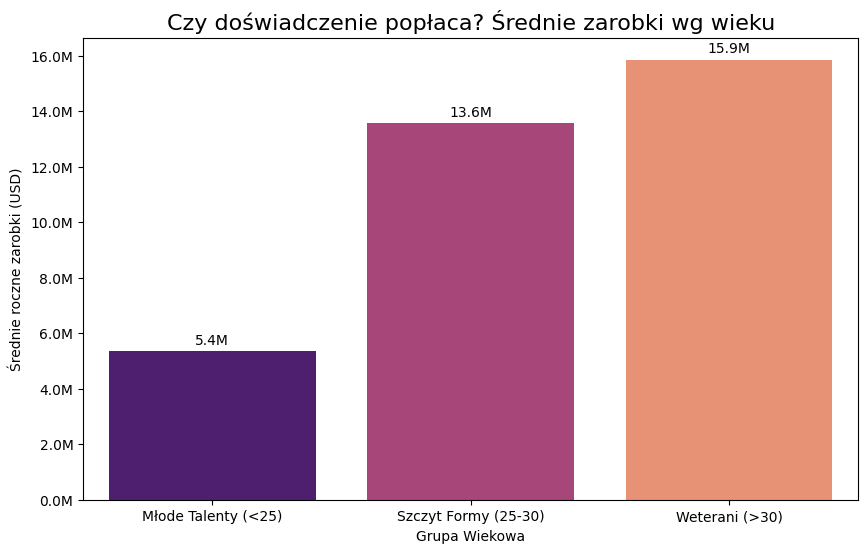

Mnożnik skali: 1 akcja obronna = 8.50 punktom.


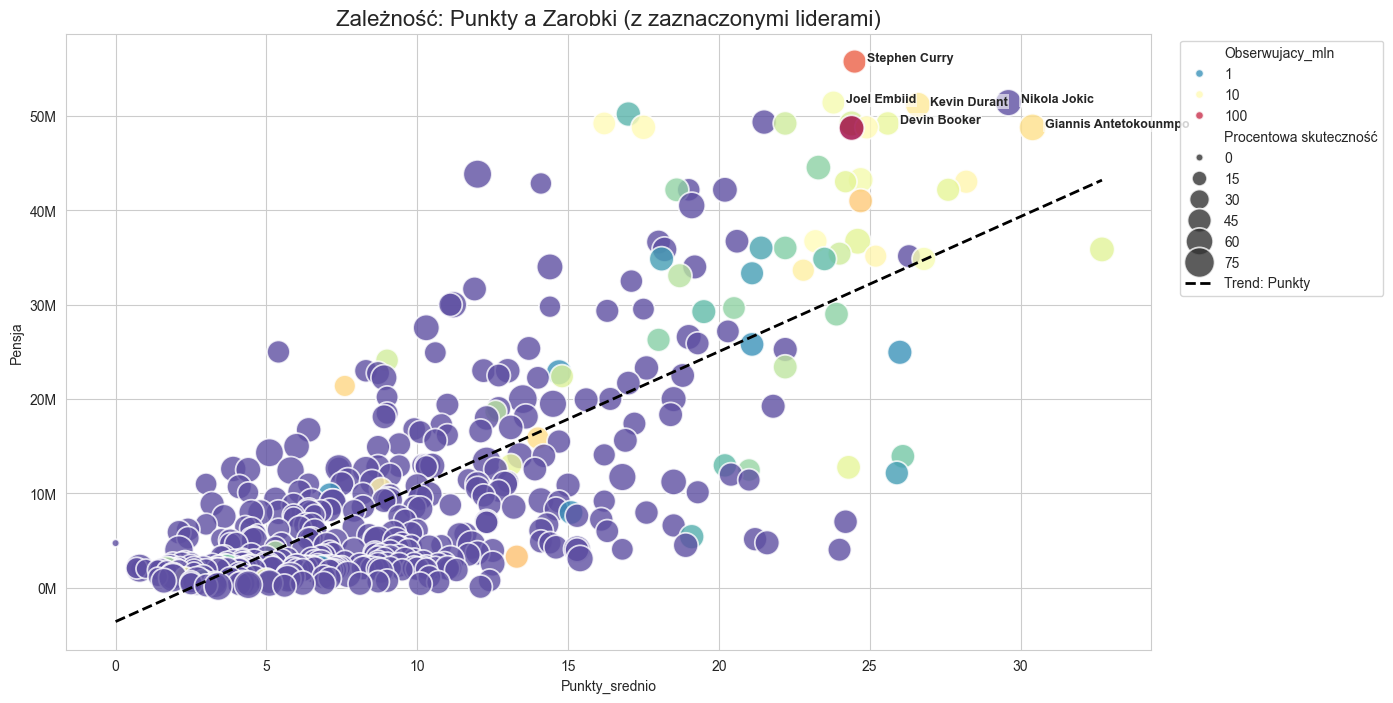

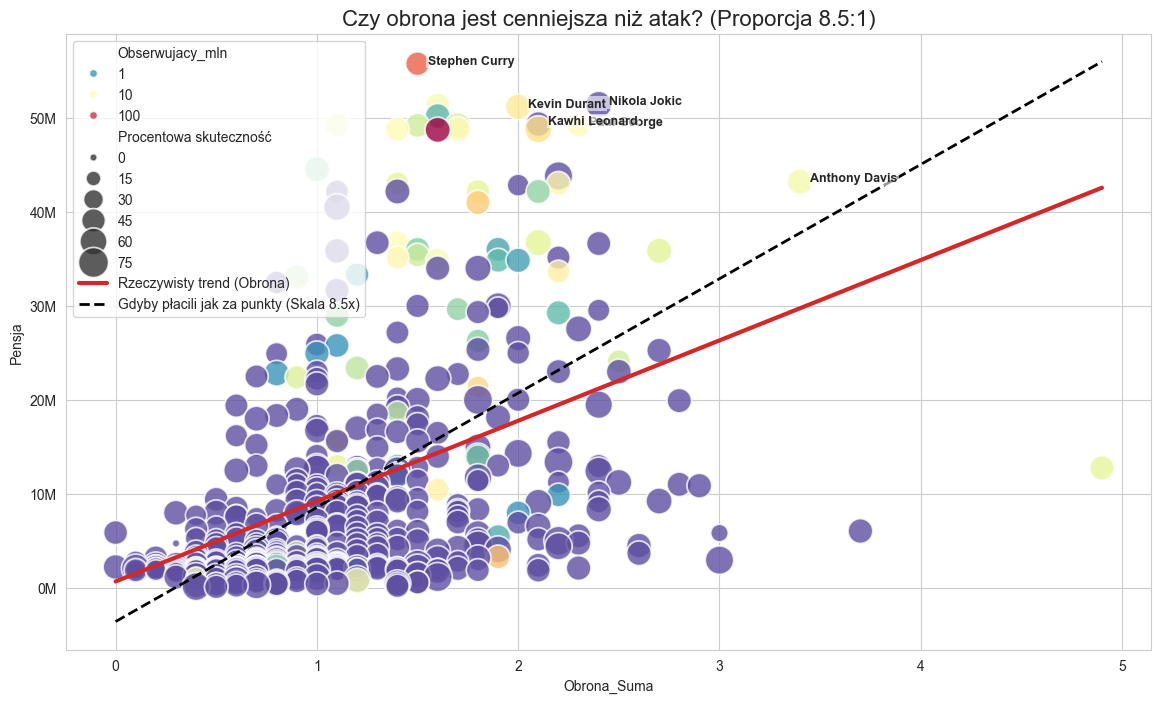

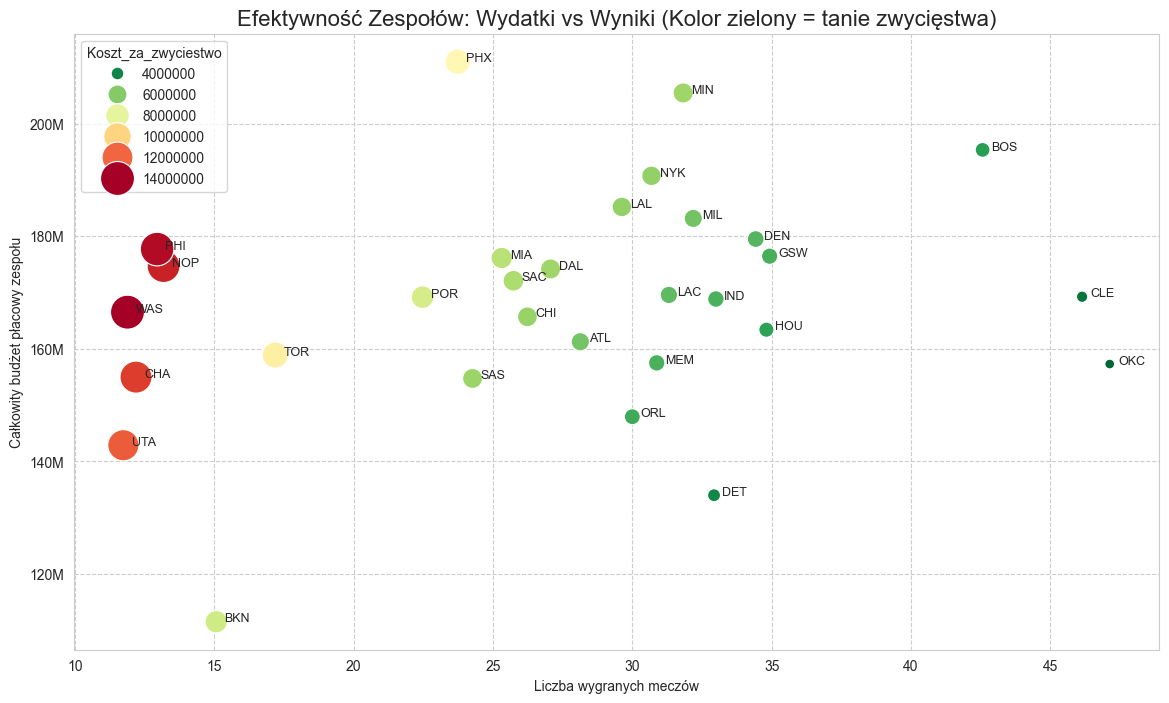

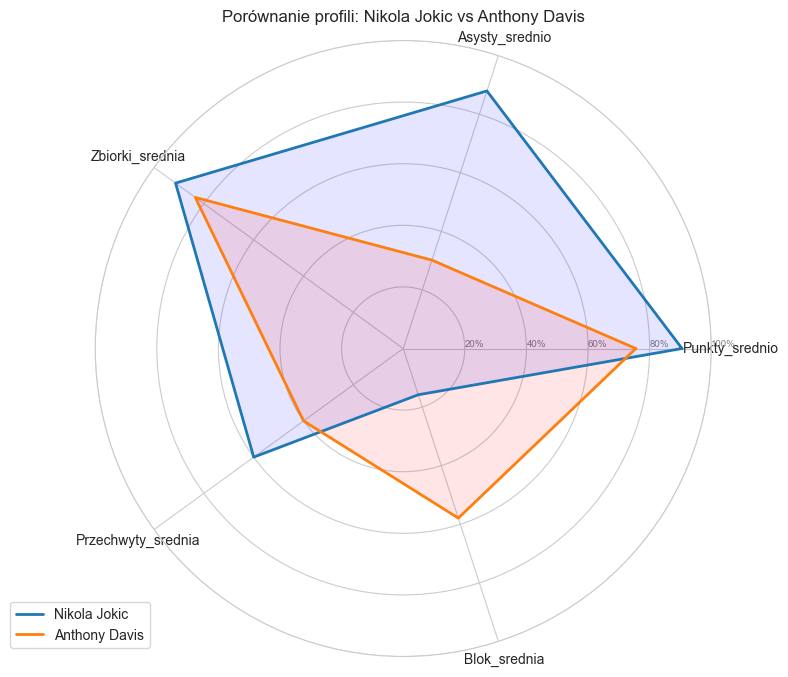

In [6]:
#WIZUALIZACJA

#5.1 WIEK A PENSJA
def kategoryzuj_wiek(wiek):
    if wiek < 25:
        return 'Młode Talenty (<25)'
    elif 25 <= wiek <= 30:
        return 'Szczyt Formy (25-30)'
    else:
        return 'Weterani (>30)'

# Tworzymy nową kolumnę
data['Grupa_wiekowa'] = data['Wiek'].apply(kategoryzuj_wiek)

# --- WYKRES ---
plt.figure(figsize=(10, 6))

# Liczymy średnią dla grup i sortujemy logicznie (Młodzi -> Szczyt -> Weterani)
order_list = ['Młode Talenty (<25)', 'Szczyt Formy (25-30)', 'Weterani (>30)']
ax = sns.barplot(x='Grupa_wiekowa', y='Pensja', data=data, order=order_list, palette='magma', errorbar=None)

plt.title('Czy doświadczenie popłaca? Średnie zarobki wg wieku', fontsize=16)
plt.ylabel('Średnie roczne zarobki (USD)')
plt.xlabel('Grupa Wiekowa')

# Formatowanie osi Y na miliony
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1_000_000:.1f}M'))

# Dodanie etykiet z wartościami na słupkach
for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f'{x/1_000_000:.1f}M', padding=3)

plt.show()

#5.2 PRZYGOTOWANIE DANYCH DO WYKRESOW PUNKTY VS PENSJA ORAZ OBRONA VS PENSJA
df = data.copy()
df.rename(columns={'Skuteczność_proc': 'Procentowa skuteczność'}, inplace=True)
df['Obrona_Suma'] = df['Blok_srednia'] + df['Przechwyty_srednia']
df = df.dropna(subset=['Punkty_srednio', 'Pensja', 'Obserwujacy_mln', 'Obrona_Suma'])

# Obliczanie trendów i mnożników
a_pts, b_pts = np.polyfit(df['Punkty_srednio'], df['Pensja'], 1)
a_def, b_def = np.polyfit(df['Obrona_Suma'], df['Pensja'], 1)
mnoznik = df['Punkty_srednio'].mean() / df['Obrona_Suma'].mean()

print(f"Mnożnik skali: 1 akcja obronna = {mnoznik:.2f} punktom.")

# Wspólne ustawienia dla obu wykresów
sns.set_style("whitegrid")
style_kwargs = {
    'hue': 'Obserwujacy_mln', 'hue_norm': LogNorm(),
    'size': 'Procentowa skuteczność', 'sizes': (30, 500),
    'alpha': 0.8, 'palette': 'Spectral_r', 'data': df
}

# --- FUNKCJA POMOCNICZA DO PODPISYWANIA ---
def podpisz_graczy(ax, x_col, offset_x=0.1, n=6):
    """Znajduje i podpisuje graczy z prawego górnego rogu (wysokie X i wysokie Salary)."""
    # Normalizujemy i sumujemy, by znaleźć "najlepszych" w obu kategoriach
    score = (df[x_col] / df[x_col].max()) + (df['Pensja'] / df['Pensja'].max())
    top = df.loc[score.nlargest(n).index]
    
    for _, row in top.iterrows():
        ax.text(row[x_col] + offset_x, row['Pensja'], row['Zawodnik'], 
                fontsize=9, weight='bold', bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', pad=1))
    
    # Formatowanie osi Y na miliony
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1_000_000:.0f}M'))

#PUNKTY A PENSJA
plt.figure(figsize=(14, 8))
ax1 = sns.scatterplot(x='Punkty_srednio', y='Pensja', **style_kwargs)

# Linia trendu
x_rng = np.linspace(df['Punkty_srednio'].min(), df['Punkty_srednio'].max(), 100)
plt.plot(x_rng, a_pts * x_rng + b_pts, 'k--', lw=2, label='Trend: Punkty')

podpisz_graczy(ax1, 'Punkty_srednio', offset_x=0.4)
plt.title('Zależność: Punkty a Zarobki (z zaznaczonymi liderami)', fontsize=16)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

#OBRONA A PENSJA
plt.figure(figsize=(14, 8))
ax2 = sns.scatterplot(x='Obrona_Suma', y='Pensja', **style_kwargs)

# Linie trendu
x_rng_def = np.linspace(df['Obrona_Suma'].min(), df['Obrona_Suma'].max(), 100)
plt.plot(x_rng_def, a_def * x_rng_def + b_def, color='#d62728', lw=3, label='Rzeczywisty trend (Obrona)')
plt.plot(x_rng_def, a_pts * (x_rng_def * mnoznik) + b_pts, 'k--', lw=2, label=f'Gdyby płacili jak za punkty (Skala {mnoznik:.1f}x)')

podpisz_graczy(ax2, 'Obrona_Suma', offset_x=0.05)
plt.title(f'Czy obrona jest cenniejsza niż atak? (Proporcja {mnoznik:.1f}:1)', fontsize=16)
plt.legend(loc='upper left')
plt.show()

#5.4 EFEKTYWNOŚĆ ZESPOŁÓW
# Grupujemy dane po zespole
team_stats = data.groupby('Zespół').agg({
    'Pensja': 'sum',    # Suma wydatków na pensje
    'Wygrane': 'mean'   # Średnia liczba wygranych (dla graczy z tego zespołu wiersze mają to samo info, więc mean jest ok)
}).reset_index()

# Obliczamy koszt jednego zwycięstwa
team_stats['Koszt_za_zwyciestwo'] = team_stats['Pensja'] / team_stats['Wygrane']

plt.figure(figsize=(14, 8))

# Rysujemy scatter plot
sns.scatterplot(data=team_stats, x='Wygrane', y='Pensja', size='Koszt_za_zwyciestwo', sizes=(50, 600), hue='Koszt_za_zwyciestwo', palette='RdYlGn_r')

# Podpisujemy każdy zespół
for i in range(team_stats.shape[0]):
    plt.text(
        team_stats.Wygrane.iloc[i]+0.3, 
        team_stats.Pensja.iloc[i], 
        team_stats.Zespół.iloc[i], 
        fontsize=9
    )

plt.title('Efektywność Zespołów: Wydatki vs Wyniki (Kolor zielony = tanie zwycięstwa)', fontsize=16)
plt.xlabel('Liczba wygranych meczów')
plt.ylabel('Całkowity budżet płacowy zespołu')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1_000_000:.0f}M'))
plt.grid(True, linestyle='--')
plt.show()

#5.5 WYKRES RADAROWY
from math import pi

# Wybieramy dwóch graczy do porównania (możesz zmienić nazwiska na te z Twojej bazy!)
# Szukamy graczy: jeden świetny strzelec, jeden świetny obrońca
gracz_1 = data[data['Punkty_srednio'] > 25].iloc[0] # Pierwszy z brzegu super strzelec
gracz_2 = data[data['Blok_srednia'] > 1.5].iloc[0]  # Pierwszy z brzegu super obrońca

labels = ['Punkty_srednio', 'Asysty_srednio', 'Zbiorki_srednia', 'Przechwyty_srednia', 'Blok_srednia']
num_vars = len(labels)

# Funkcja pomocnicza do normalizacji danych (żeby skala była 0-1 dla każdej statystyki)
def normalize(value, col_name):
    return (value - data[col_name].min()) / (data[col_name].max() - data[col_name].min())

# Przygotowanie danych do wykresu
values_1 = [normalize(gracz_1[col], col) for col in labels]
values_2 = [normalize(gracz_2[col], col) for col in labels]

# Domykanie pętli wykresu (ostatni punkt musi łączyć się z pierwszym)
values_1 += values_1[:1]
values_2 += values_2[:1]
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Rysowanie
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Oś 1
ax.plot(angles, values_1, linewidth=2, linestyle='solid', label=gracz_1['Zawodnik'])
ax.fill(angles, values_1, 'b', alpha=0.1)

# Oś 2
ax.plot(angles, values_2, linewidth=2, linestyle='solid', label=gracz_2['Zawodnik'])
ax.fill(angles, values_2, 'r', alpha=0.1)

# Opisy osi
plt.xticks(angles[:-1], labels)
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["20%","40%","60%","80%","100%"], color="grey", size=7)
plt.ylim(0, 1)

plt.title(f"Porównanie profili: {gracz_1['Zawodnik']} vs {gracz_2['Zawodnik']}")
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


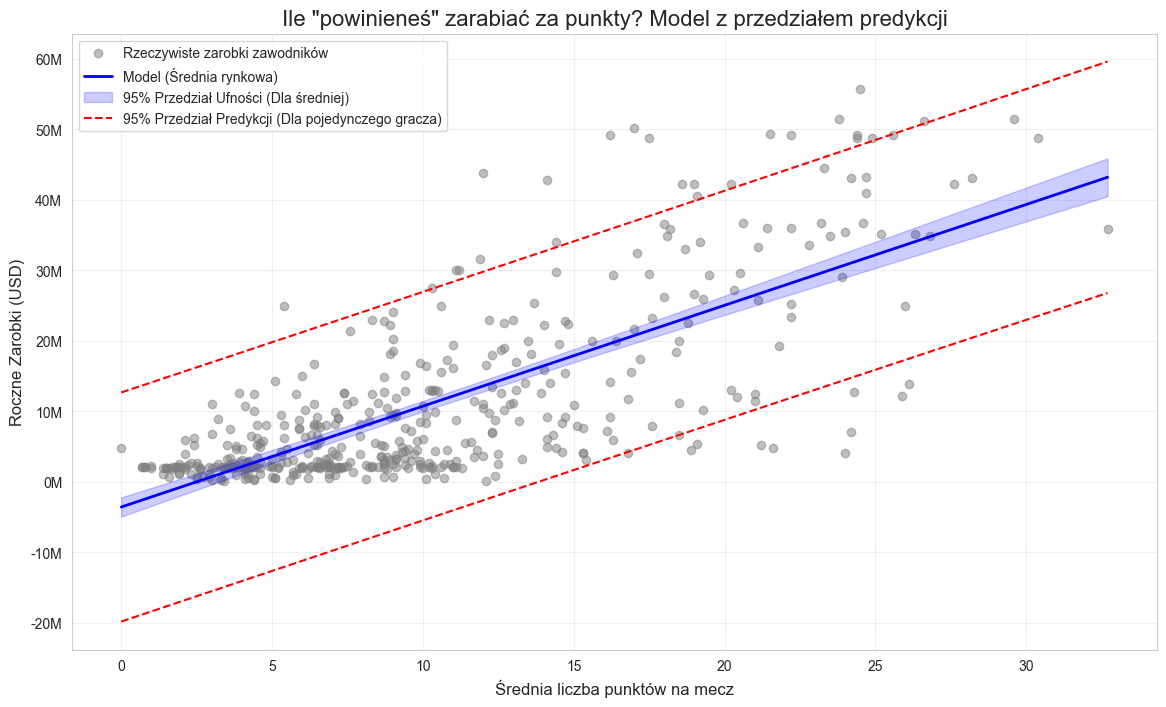


--- SYMULACJA DLA ZAWODNIKA RZUCAJĄCEGO 20 PKT ---
Przewidywana pensja (średnia): $25.04 mln
Minimalna oferta (dolna granica predykcji): $8.79 mln
Maksymalna oferta (górna granica predykcji): $41.28 mln
Siła dopasowania modelu (R-kwadrat): 56.53%
--- WYNIKI: MODEL ZE WSZYSTKIMI ZMIENNYMI ---
R-squared (Dopasowanie): 0.6607

Istotność zmiennych (P-value < 0.05 oznacza, że zmienna jest ważna):
Wiek              0.00
Punkty_srednio    0.00
const             0.00
Obserwujacy_mln   0.02
Przegrane         0.02
dtype: float64


--- WYNIKI: MODEL Z WYBRANYMI ZMIENNYMI ---
                            OLS Regression Results                            
Dep. Variable:                 Pensja   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     166.9
Date:                Fri, 16 Jan 2026   Prob (F-statistic):          4.18e-101
Time:                        20:4

C:\Users\domin\AppData\Local\Temp\ipykernel_11036\2441015763.py:177: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Waga', y='Zmienna', data=importances, palette='viridis')


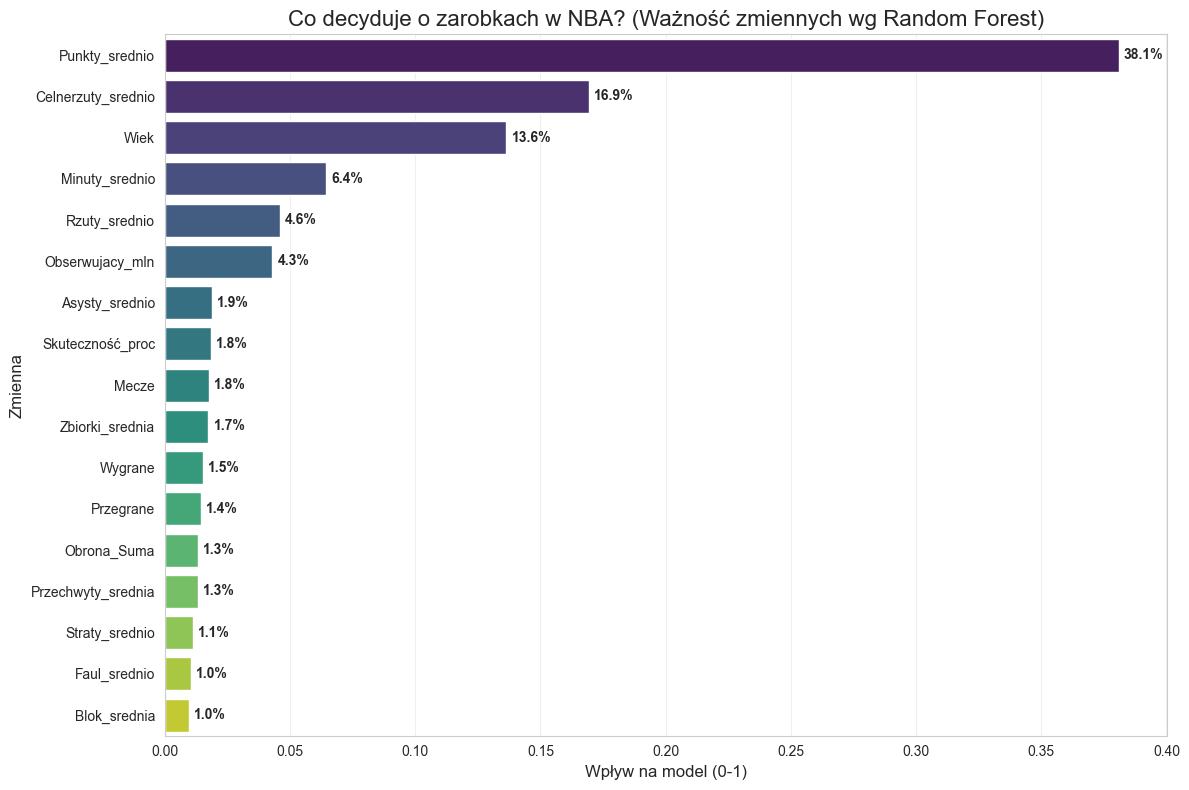

In [7]:
#WNIOSKOWANIE STATYSTYCZNE

# 1. PRZYGOTOWANIE DANYCH
# Wybieramy tylko interesujące nas kolumny i usuwamy braki
df_reg = data[['Punkty_srednio', 'Pensja']].dropna()

X = df_reg['Punkty_srednio']
y = df_reg['Pensja']

# Dodajemy stałą (tzw. intercept/wyraz wolny), co jest wymagane w statsmodels
X_const = sm.add_constant(X)

# 2. BUDOWA MODELU STATYSTYCZNEGO (OLS)
model = sm.OLS(y, X_const)
results = model.fit()

# 3. OBLICZANIE PRZEDZIAŁÓW
# Tworzymy zakres punktów od 0 do max (żeby linie były gładkie)
x_range = np.linspace(X.min(), X.max(), 100)
x_range_const = sm.add_constant(x_range)

# Pobieramy przewidywania wraz z przedziałami (alpha=0.05 oznacza 95% pewności)
predictions = results.get_prediction(x_range_const)
pred_frame = predictions.summary_frame(alpha=0.05)

# 4. RYSOWANIE WYKRESU
plt.figure(figsize=(14, 8))

# A) Rzeczywiste dane (szare kropki)
plt.scatter(X, y, alpha=0.5, color='gray', label='Rzeczywiste zarobki zawodników')

# B) Linia regresji (Średnia przewidywana)
plt.plot(x_range, pred_frame['mean'], 'b-', linewidth=2, label='Model (Średnia rynkowa)')

# C) Przedział Ufności (Confidence Interval) - CIEMNIEJSZY CIEŃ
# Interpretacja: Jesteśmy na 95% pewni, że ŚREDNIA pensja dla danej liczby punktów leży tutaj.
plt.fill_between(x_range, 
                 pred_frame['mean_ci_lower'], 
                 pred_frame['mean_ci_upper'], 
                 color='blue', alpha=0.2, label='95% Przedział Ufności (Dla średniej)')

# D) Przedział Predykcji (Prediction Interval) - CZERWONE LINIE
# Interpretacja: Tutaj wpadnie 95% KONKRETNYCH ZAWODNIKÓW. To są realne "widełki" negocjacyjne.
plt.plot(x_range, pred_frame['obs_ci_lower'], 'r--', linewidth=1.5, label='95% Przedział Predykcji (Dla pojedynczego gracza)')
plt.plot(x_range, pred_frame['obs_ci_upper'], 'r--', linewidth=1.5)

# 5. KOSMETYKA WYKRESU
plt.title('Ile "powinieneś" zarabiać za punkty? Model z przedziałem predykcji', fontsize=16)
plt.xlabel('Średnia liczba punktów na mecz', fontsize=12)
plt.ylabel('Roczne Zarobki (USD)', fontsize=12)

# Formatowanie osi Y na miliony (np. 10M, 20M)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1_000_000:.0f}M'))

plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

# --- DODATEK: KALKULATOR ---
# Sprawdźmy, ile model przewiduje dla kogoś, kto rzuca 20 punktów
punkty_testowe = 20
przewidywanie = results.get_prediction([1, punkty_testowe]) # [1, 20] bo 1 to stała
wynik = przewidywanie.summary_frame(alpha=0.05)

print(f"\n--- SYMULACJA DLA ZAWODNIKA RZUCAJĄCEGO {punkty_testowe} PKT ---")
print(f"Przewidywana pensja (średnia): ${wynik['mean'][0]/1_000_000:.2f} mln")
print(f"Minimalna oferta (dolna granica predykcji): ${wynik['obs_ci_lower'][0]/1_000_000:.2f} mln")
print(f"Maksymalna oferta (górna granica predykcji): ${wynik['obs_ci_upper'][0]/1_000_000:.2f} mln")
print(f"Siła dopasowania modelu (R-kwadrat): {results.rsquared:.2%}")

#MODEL REGRESJI
# 1. PRZYGOTOWANIE DANYCH
# Wybieramy tylko kolumny numeryczne
df_reg = data.select_dtypes(include=['number']).copy()

# Usuwamy wiersze z pustymi danymi
df_reg = df_reg.dropna()

# Zmienna zależna (To co chcemy przewidzieć - Y)
y = df_reg['Pensja']

# --- MODEL 1: WSZYSTKIE ZMIENNE ---
# Zmienne niezależne (X) - usuwamy Salary (bo nie możemy przewidywać pensji pensją)
# Usuwamy też 'Koszt_za_punkt' i 'Punkty_total' jeśli je stworzyłeś, bo wynikają bezpośrednio z Salary
X_all = df_reg.drop(columns=['Pensja'], errors='ignore')
# Opcjonalnie usuń też kolumny pochodne jeśli masz (np. 'Punkty_total', 'Koszt_za_punkt'), żeby nie psuły modelu

# Dodajemy stałą (wymagane w statsmodels)
X_all = sm.add_constant(X_all)

model_all = sm.OLS(y, X_all).fit()

print("--- WYNIKI: MODEL ZE WSZYSTKIMI ZMIENNYMI ---")
print(f"R-squared (Dopasowanie): {model_all.rsquared:.4f}")
# Wyświetlamy tylko p-wartości, żeby nie zaśmiecać ekranu całą tabelą
print("\nIstotność zmiennych (P-value < 0.05 oznacza, że zmienna jest ważna):")
print(model_all.pvalues[model_all.pvalues < 0.05].sort_values())


# --- MODEL 2: TYLKO ISTOTNE ZMIENNE (SELEKCJA EKSPERCKA) ---
# Wybieramy te, które zazwyczaj mają sens logiczny i statystyczny
# Punkty (Gwiazda), Obserwujący (Marketing), Wiek (Doświadczenie), Minuty (Rola w zespole)
zmienne_istotne = ['Punkty_srednio', 'Obserwujacy_mln', 'Wiek', 'Minuty_srednio', 'Efektywnosc_suma'] # Dostosuj nazwy jeśli masz inne

# Sprawdzamy czy te kolumny istnieją w Twoim df, wybieramy tylko dostępne
dostepne_zmienne = [col for col in ['Punkty_srednio', 'Obserwujacy_mln', 'Wiek', 'Minuty_srednio', 'Skuteczność_proc'] if col in df_reg.columns]

X_selected = df_reg[dostepne_zmienne]
X_selected = sm.add_constant(X_selected)

model_selected = sm.OLS(y, X_selected).fit()

print("\n\n--- WYNIKI: MODEL Z WYBRANYMI ZMIENNYMI ---")
print(model_selected.summary())

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. PRZYGOTOWANIE DANYCH
# Wybieramy tylko kolumny numeryczne
df_rf = data.select_dtypes(include=['number']).copy()

# UWAGA: Musimy usunąć kolumny, które powstały BEZPOŚREDNIO z Salary,
# bo inaczej model "oszuka" i wynik będzie zafałszowany (Data Leakage).
# Usuwamy też 'Koszt_za_punkt' itp., jeśli je stworzyłeś wcześniej.
cols_to_drop = ['Pensja', 'Koszt_za_punkt', 'Punkty_total'] 
# (Dodaj tu inne kolumny pomocnicze, jeśli takie masz, np. log_Salary)

# Sprawdzamy co możemy usunąć (żeby nie było błędu, jeśli kolumna nie istnieje)
cols_to_drop = [c for c in cols_to_drop if c in df_rf.columns]

X = df_rf.drop(columns=cols_to_drop)
y = df_rf['Pensja']

# Usuwamy braki danych (NaN)
X = X.dropna()
y = y[X.index] # Dopasowujemy y do X po usunięciu wierszy

# Dzielimy na zbiór treningowy (80%) i testowy (20%)
# To ważne, żeby sprawdzić, czy model radzi sobie na nowych danych
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. TRENOWANIE LASU LOSOWEGO (RANDOM FOREST)
# n_estimators=100 oznacza, że tworzymy 100 drzew decyzyjnych
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# 3. OCENA MODELU
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("--- WYNIKI MODELU RANDOM FOREST ---")
print(f"R-squared (Ile % zmienności wyjaśnia model): {r2:.2%}")
print(f"Średni błąd (MAE): ${mae:,.2f}")


# 4. WAŻNOŚĆ ZMIENNYCH (FEATURE IMPORTANCE)
# Wyciągamy wagi z modelu
importances = pd.DataFrame({
    'Zmienna': X.columns,
    'Waga': rf_model.feature_importances_
})

# Sortujemy od najważniejszej
importances = importances.sort_values(by='Waga', ascending=False)

# 5. WIZUALIZACJA
plt.figure(figsize=(12, 8))

# Rysujemy wykres słupkowy
sns.barplot(x='Waga', y='Zmienna', data=importances, palette='viridis')

plt.title('Co decyduje o zarobkach w NBA? (Ważność zmiennych wg Random Forest)', fontsize=16)
plt.xlabel('Wpływ na model (0-1)', fontsize=12)
plt.ylabel('Zmienna', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Dodajemy wartości liczbowe na słupkach
for i, v in enumerate(importances['Waga']):
    plt.text(v + 0.002, i, f'{v:.1%}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()